In [19]:
import os
import re
import sys
import numpy as np
import pandas as pd

from scipy.spatial.transform import Rotation as R

import matplotlib.pyplot as plt

In [2]:
sys.path.append('../')

## 1. Upload data

In [3]:
! ls ../data/raw/optokinetics

Илья_оптокинетика после_2021_08_15_13_53_55.txt


In [5]:
columns = ['Frequency', 'Amplitude', 'LeftYaw', 'RightYaw', 'RotAngleZ', 'RotAngleY', 'RotAngleX']

In [24]:
def convert(s: str) -> np.array:
    s = re.sub('\n', ' ', s)
    s = re.sub(',', '.', s)
    return np.array([float(i) for i in s.split(';')], dtype=np.float64)


def load_txt(file_name: str, size: int = 9) -> np.array:
    data = np.ones(size)
    with open(file_name, 'r') as file:
        cnt = 0
        for line in file:
            try:
                row = convert(line)
                data = np.vstack((data, row))
            except ValueError:
                cnt += 1
                if cnt > 1:
                    break
    return data[1:]

In [67]:
# file_name = 'Григорий_до оптокинетика_2021_07_24_11_06_50.txt'
file_name = 'Максим_Полет АН-2 4_2021_07_18_18_41_47.txt'
work_dir = 'flights'

raw_data = load_txt('../data/raw/{}/{}'.format(work_dir, file_name))

In [68]:
eye_id = 1
head_id = 6

In [69]:
eye_angles = np.radians(raw_data[:, 1:3])

head_angles = np.zeros((raw_data.shape[0], 3), dtype='float64')
for i in range(0, raw_data.shape[0]-1):
    q = R.from_quat(raw_data[i, 3:7])
    head_angles[i, :] = q.as_euler('zyx', degrees=False)

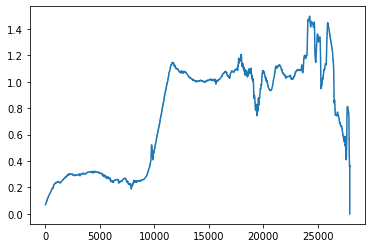

In [70]:
plt.plot(head_angles[:, 1])

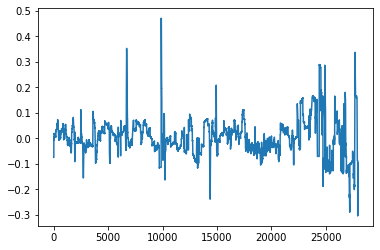

In [71]:
plt.plot(eye_angles[:, 0])

In [14]:
freq_amplitudes = np.zeros((raw_data.shape[0], 2), dtype='float64')

In [15]:
prep_data = np.concatenate((freq_amplitudes, eye_angles, head_angles), axis=1)

In [16]:
prep_df = pd.DataFrame(data=prep_data, columns=columns)

In [17]:
prep_df.to_csv('../data/prep/{}/{}'.format(work_dir, file_name), index=False)

In [50]:
# izhikevich AF on winter data

mse = np.array([0.00017572, 0.00033217, 0.0003194, 0.00031991, 0.00025839, 0.00075192, 0.00152184, 0.00062935, 0.00042328, 0.00016103,
                0.00094594, 0.00024467, 0.00025998, 0.00162755, 0.00067196, 0.00039491, 0.00011802, 0.00027588, 0.00037111, 0.00115311])

mae = np.array([0.0090469, 0.01168236, 0.01229351,  0.01285254, 0.00983739, 0.01701338, 0.01961763, 0.01675926, 0.01052501, 0.00754243,
                0.01814668, 0.00930062, 0.01047446, 0.01966745, 0.0165236, 0.01376884, 0.00680947, 0.01083664, 0.01198955, 0.01870647])

smae = np.array([0.12956807, 0.1819155, 0.16433278, 0.21452208, 0.1400658, 0.96052824, 0.39872924, 0.1813634, 0.32899149, 0.0924525,
                 0.4070439, 0.17609991, 0.15657918, 0.54012073, 0.34908827, 0.18722932, 0.06719564, 0.13252809, 0.19384393, 0.49005734]) 


print("""
    MSE train: mean={:2.6f}, std={:2.6f}
    MAE train: mean={:2.6f}, std={:2.6f}
    sMAE train: mean={:2.6f}, std={:2.6f}
""".format(
        np.mean(mse), np.std(mse),
        np.mean(mae), np.std(mae),
        np.mean(smae), np.std(smae),
    )
)


    MSE train: mean=0.000548, std=0.000432
    MAE train: mean=0.013170, std=0.003987
    sMAE train: mean=0.274613, std=0.204356



In [51]:
# sigmoidal AF on winter data

mse = np.array([0.00061699, 0.00078885, 0.00077167, 0.00087972, 0.00072583, 0.00085258, 0.00125359, 0.00084792, 0.00092103, 0.0005367,
                0.00102911, 0.00047207, 0.00070082, 0.00206104, 0.00079452, 0.00058986, 0.00055244, 0.00092369, 0.00060858, 0.00117788])

mae = np.array([0.02038192, 0.02144699, 0.02210823, 0.02364636, 0.02193728, 0.0204382, 0.02333401, 0.02328355, 0.02322498, 0.0207238,
                0.02316973, 0.01757939, 0.02170086, 0.02930907, 0.02227998, 0.01988072, 0.02070834, 0.0241754, 0.0197822, 0.02358954])

smae = np.array([0.2919061, 0.33396849, 0.29553043, 0.39468197, 0.31234521, 1.15388382, 0.47426497, 0.25196718, 0.72596792, 0.2540252, 
                 0.51971453, 0.33285194, 0.32439901, 0.8049053, 0.47070134, 0.27033896, 0.20434922, 0.29565608, 0.31983361, 0.61798027]) 


print("""
    MSE train: mean={:2.6f}, std={:2.6f}
    MAE train: mean={:2.6f}, std={:2.6f}
    sMAE train: mean={:2.6f}, std={:2.6f}
""".format(
        np.mean(mse), np.std(mse),
        np.mean(mae), np.std(mae),
        np.mean(smae), np.std(smae),
    )
)


    MSE train: mean=0.000855, std=0.000342
    MAE train: mean=0.022135, std=0.002314
    sMAE train: mean=0.432464, std=0.229167

